<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 4 - Machine Learning - Classification <br>
<font color=0CBCDF size=4>
   &#x1F335; Amirhossein Akbari  &#x1F335;
</div>

____

<font color=9999FF size=4>
&#x1F388; Full Name : "Ali Ghasemzadeh"
<br>
<font color=9999FF size=4>
&#x1F388; Student Number : "401106339"

<font color=0080FF size=3>
This Jupyter Notebook is dedicated to exploring a classification task focused on predicting traveler satisfaction levels with airline services. In our scenario, we aim to classify whether a passenger is satisfied or not based on various features related to their travel experience. To tackle this task, we will develop and compare three different machine learning models:
</font>
<br>

1. **Naive Bayes Classifier**: <font color=66B2FF size=2>We'll start by implementing a Naive Bayes classifier without the use of high-level libraries, understanding its mechanics and applying it to our dataset.</font>

2. **Decision Tree Classifier**: <font color=66B2FF size=2>Next, we will build a Decision Tree model from the ground up, enabling us to delve into how decisions are made and splits are performed based on the data.</font>

<font color=0080FF size=3>
For each model, we'll go through the process of data preprocessing, model training, and evaluation to compare their performance. By the end of this notebook, you should have a clear understanding of these models' workings and their effectiveness in predicting airline passenger satisfaction.
</font>

1. <font color=red size=3>**Run All Cells Before Submission**</font>: <font color=FF99CC size=2>Before saving and submitting your notebook, please ensure you run all cells from start to finish. This practice guarantees that your notebook is self-consistent and can be evaluated correctly by others.</font>

2. <font color=red size=3>**Model Evaluation and Scoring Criteria**</font>: <font color=FF99CC size=2>To receive full marks for a model implementation, the accuracy of your custom model must be within 5 percentage points of the corresponding scikit-learn model's accuracy. Should your model's accuracy fall more than <mark>5 percentage</mark> points below that of the scikit-learn model, or if the scikit-learn model's accuracy is below 80%, points will be deducted accordingly.</font>

<font color=#ffb578 size=3>
you are free to modify, add, or remove any cells as you see fit to complete your tasks. Feel free to change any of the provided code or content to better suit your understanding and approach to the problems.

- **Questions**: If you have any questions or require clarifications as you work through the notebook, please do not hesitate to ask. You can post your queries on Quera or reach out via Telegram.
- **Feedback**: We encourage you to seek feedback and engage in discussions to enhance your learning experience and improve your solutions.
</font>

Importing necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Before proceeding, please execute the cell below to download the dataset if you're using Kaggle or Colab; if running locally, utilize the dataset in the 'HW' folder.

In [2]:
# %pip install wget
current_path = os.getcwd()
data_url = "https://www.dropbox.com/scl/fi/75xu0qz933plnpid1uplz/AI-HW4-Q2-Data.csv?rlkey=47o5ksm1qyoabswahequk7t1d&dl=0"
data_path = os.path.join(current_path, "data.csv")
!wget -q -O "{data_path}" "{data_url}"

'wget' is not recognized as an internal or external command,
operable program or batch file.


# Data Exploration (5 point)
In this section, we perform some data exploration to get a better understanding of the data.

## Task1: Load and Inspect the Dataset (2 point)
Load the train dataset as a dataframe and show the first 10 rows of the dataframe

In [3]:
# Load dataset and display the first 10 rows
df = pd.read_csv("Dataset/data.csv")
df.head(10)

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,satisfaction
0,Loyal Customer,Business travel,Business,1727,1,1,4,5,5,satisfied
1,Loyal Customer,Personal Travel,Eco,1546,3,3,3,2,2,neutral or dissatisfied
2,disloyal Customer,Business travel,Eco,1086,5,5,5,1,1,satisfied
3,Loyal Customer,Business travel,Business,2644,2,5,4,3,2,neutral or dissatisfied
4,Loyal Customer,Business travel,Eco,302,4,1,3,4,4,neutral or dissatisfied
5,Loyal Customer,Business travel,Eco,125,5,2,5,5,5,satisfied
6,Loyal Customer,Business travel,Business,248,3,3,5,5,5,satisfied
7,disloyal Customer,Business travel,Eco,547,2,2,2,1,1,neutral or dissatisfied
8,Loyal Customer,Business travel,Eco Plus,472,4,1,4,4,4,satisfied
9,Loyal Customer,Business travel,Business,2875,2,4,4,4,5,satisfied


## Task 2: Dataset Overview (4 point)
Perform an initial exploration of the dataset to understand its structure, including the number of features, rows, and the types of data (numerical or categorical) it contains. Use methods like [.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) and [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for this purpose.

In [4]:
print(df.shape)
print(df.info())

(25000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer Type           25000 non-null  object
 1   Type of Travel          25000 non-null  object
 2   Class                   25000 non-null  object
 3   Flight Distance         25000 non-null  int64 
 4   Inflight wifi service   25000 non-null  int64 
 5   Ease of Online booking  25000 non-null  int64 
 6   Online boarding         25000 non-null  int64 
 7   Seat comfort            25000 non-null  int64 
 8   Inflight entertainment  25000 non-null  int64 
 9   satisfaction            25000 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.9+ MB
None


## Task 3: Distribution and Analysis (4 point)
Visualize the distribution of both numerical and categorical features in the dataset using [histograms](https://matplotlib.org/stable/gallery/statistics/hist.html) for numerical data and [bar charts](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) for categorical data. Analyze these distributions to identify any patterns, outliers, or anomalies in the data.

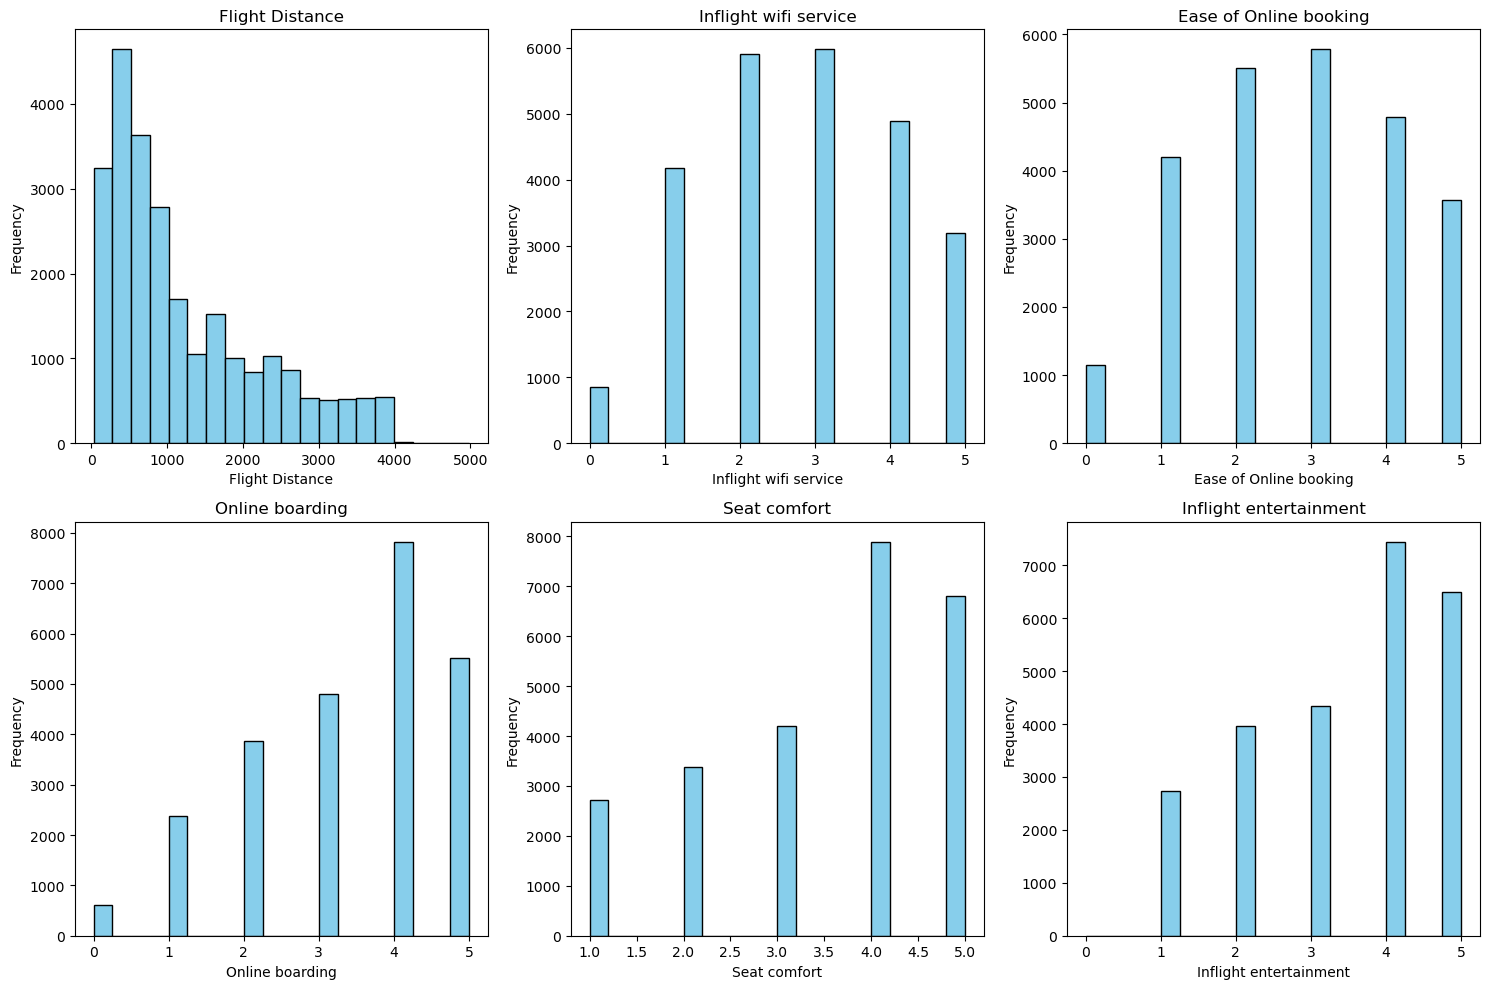

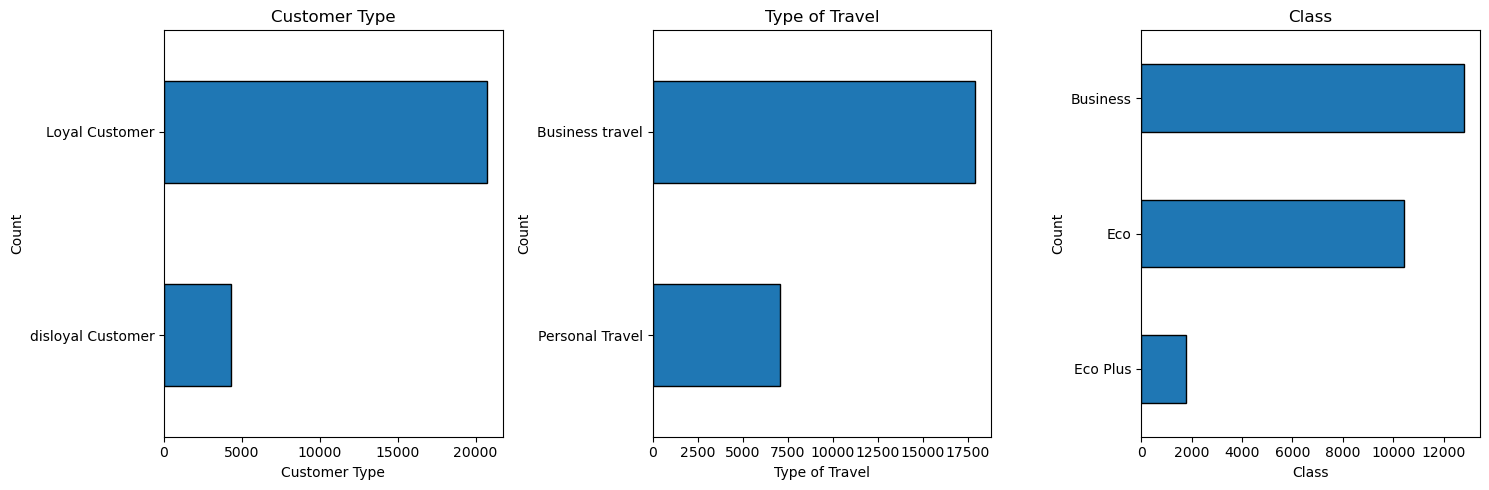

In [5]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_size = len(numerical_cols)
row_size = 3
num_numerical_rows = -(-numerical_size // row_size)

fig, axes = plt.subplots(num_numerical_rows, row_size, figsize=(15, 5*num_numerical_rows))
for i, column in enumerate(numerical_cols):
    row = i // row_size
    col = i % row_size
    ax = axes[row, col] if num_numerical_rows > 1 else axes[col]
    df[column].plot(kind="hist", ax=ax, bins=20, title=column, color="skyblue",  edgecolor="black")
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('satisfaction', errors='ignore')
categorical_size = len(categorical_cols)
num_categorical_rows = -(-categorical_size // row_size)

fig, axes = plt.subplots(num_categorical_rows, row_size, figsize=(15, 5*num_categorical_rows))
for i, column in enumerate(categorical_cols):
    row = i // row_size
    col = i % row_size
    ax = axes[row, col] if num_categorical_rows > 1 else axes[col]
    df[column].value_counts()[::-1].plot(kind='barh', ax=ax, title=column, edgecolor="black")
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Task 1: Handling Missing Values (2 point)
In this task, we will handle missing values by [dropping](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) records that contain missing values.

In [6]:
df = df.dropna()

## Task 2: Converting Categorical Variables to Numeric (7 point)
We will use [one-hot encoding](https://www.kdnuggets.com/2023/07/pandas-onehot-encode-data.html) to convert categorical variables into a format that can be provided to ML algorithms. Also convert the categorical target variable 'satisfaction' into numeric format, where 'satisfied' is mapped to 1 and 'neutral or dissatisfied' is mapped to 0.

In [7]:
df_one_hot = pd.get_dummies(df, columns=categorical_cols)
df_one_hot['satisfaction'] = df_one_hot['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
df_one_hot = df_one_hot.astype(int)

## Task 3: Splitting the Data into Training and Test Sets(6 point)
Finally, [split your data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) into training and test sets. This is a critical step for training and evaluating the performance of your models.

In [8]:
X = df_one_hot.drop(columns=['satisfaction']).values
Y = df_one_hot['satisfaction'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20000, 13) (20000,)
(5000, 13) (5000,)


<font size=3>
Now that our data is prepared and we have separate training and testing datasets, along with the necessary preprocessing completed, we are ready to move on to the model building and training phase. We will start with the Naive Bayes classifier, which is our first model in this series of experiments.

# Naive Bayes Classifier (25 point)

## Task 1: Implement Naive Bayes Classifier from Scratch (15 point)
In this task, you will implement the [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) from scratch. This will involve calculating the prior probabilities for each class, the likelihood of the data given the class, and using these to calculate the posterior probabilities for the prediction.


[This video](https://www.youtube.com/watch?v=O2L2Uv9pdDA) will be helpful too.
Especially [this model](https://www.youtube.com/watch?v=H3EjCKtlVog).


In [11]:
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.variances = None
        self.priors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.variances = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, clas in enumerate(self.classes):
            X_clas = X[y == clas]
            self.mean[idx, :] = X_clas.mean(axis=0)
            self.variances[idx, :] = X_clas.var(axis=0)
            self.priors[idx] = X_clas.shape[0] / float(n_samples)

    def _gaussian_pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        variance = self.variances[class_idx]
        return np.exp(- (x - mean) ** 2 / (2 * variance)) / np.sqrt(2 * np.pi * variance)

    def predict_one_x(self, x):
        posteriors = []
        for idx, c in enumerate(self.classes):
            # get the log of prior sample 
            prior = np.log(self.priors[idx]) 
            # we have product of conditional probs and when we get log from them product changes to sum of logs
            conditionals = np.sum(np.log(self._gaussian_pdf(idx, x)))
            posterior = prior + conditionals # posterior = prior * conditionals and when we get log : log(posterior) = log(prior) +
                                                                                                                    # log(conditionals)
            posteriors.append(posterior) 
        return self.classes[np.argmax(posteriors)] # return the porsterior that have the maximum of log prob

    def predict(self, X):
        return np.array([self.predict_one_x(x) for x in X])

## Task 2: Train Naive Bayes Model from Scratch (2 point)
Instantiate the NaiveBayesClassifier class and fit it to the training data.

In [12]:
# Instantiate the NaiveBayesClassifier and train it with the training dataset
# TODO: Create an instance of NaiveBayesClassifier and fit it to the training data using the fit method.
naive = NaiveBayesClassifier()
naive.fit(X_train, Y_train)

## Task 3: Train Naive Bayes Model Using scikit-learn (5 point)
Utilize the [Naive Bayes class from scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html) to train a Naive Bayes model on the same dataset.

In [18]:
# Initialize and train a Gaussian Naive Bayes model using scikit-learn
# TODO: Use scikit-learn's GaussianNB to create and fit a model to the training dataset.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print("number of wrongs from %d points is : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

number of wrongs from 5000 points is : 846


## Task 4: Evaluate and Compare Both Models (3 point)
Evaluate both the custom-built Naive Bayes model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) to further analyze and compare their performance in terms of [accuracy, precision, recall, and F1 score](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score).
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.

In [19]:
y_pred_custom = naive.predict(X_test)
class_names = ['neutral or dissatisfied', 'satisfied']
y_test_names = [class_names[label] for label in Y_test]
y_pred_custom_names = [class_names[label] for label in y_pred_custom]

print("Confusion Matrix (Scratch)")
print(confusion_matrix(y_test_names, y_pred_custom_names))
print("\nClassification Report (scratch):")
print(classification_report(y_test_names, y_pred_custom_names))
print("------------------------------------------------------")
y_pred_sklearn = gnb.predict(X_test)
y_pred_sklearn_names = [class_names[label] for label in y_pred_sklearn]
print("Confusion Matrix:")
print(confusion_matrix(y_test_names, y_pred_sklearn_names))
print("\nClassification Report(Sklearn):")
print(classification_report(y_test_names, y_pred_sklearn_names))

Confusion Matrix (Scratch)
[[2049  435]
 [ 412 2104]]

Classification Report (scratch):
                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.82      0.83      2484
              satisfied       0.83      0.84      0.83      2516

               accuracy                           0.83      5000
              macro avg       0.83      0.83      0.83      5000
           weighted avg       0.83      0.83      0.83      5000

------------------------------------------------------
Confusion Matrix:
[[2048  436]
 [ 410 2106]]

Classification Report(Sklearn):
                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.82      0.83      2484
              satisfied       0.83      0.84      0.83      2516

               accuracy                           0.83      5000
              macro avg       0.83      0.83      0.83      5000
           weighted avg       0.83      0.83      0.83     

# Decision tree Classifier (25 point)

## Task 1: Implement Decision Tree Classifier from Scratch (15 point)
In this task, you are to implement a [Decision Tree Classifier](https://en.wikipedia.org/wiki/Decision_tree) entirely from scratch. The core framework of the classifier has been outlined for you, including several helper methods that you might find useful. These methods are intended to guide your implementation and provide a structured way to approach the problem.You are not strictly bound to the provided private methods (`_compute_entropy`, `_split_data`, etc.). If you find a more efficient or clearer way to implement these functionalities, you are encouraged to adjust the methods accordingly.

[This video](https://www.youtube.com/watch?v=_L39rN6gz7Y) will be helpful too.

In [27]:
import numpy as np

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, 0)

    def predict(self, X):
        predictions = [self._predict(inputs) for inputs in X]
        return np.array(predictions)

    def _compute_entropy(self, y):
        hist = np.bincount(y) # get occurences of each value 
        ps = hist / len(y) # calculate the prob of each value
        return -np.sum([p * np.log2(p) for p in ps if p > 0]) # get the sum of -p*log2(p)

    def _split_data(self, X, y, feature_index, threshold):
        # separate data to left and right based on bigger or less/equal than threshold
        left = X[:, feature_index] <= threshold # indexes that are smaller than threshold
        right = X[:, feature_index] > threshold # indexes that are bigger than threshold
        return X[left], X[right], y[left], y[right] # split X and Y base on threshold and the feature index

    def _find_best_split(self, X, y):
        best_feature_index, best_threshold = None, None
        best_entropy = float('inf')
        
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split_data(X, y, feature_index, threshold)
                # if one side = 0 then separating is not good
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                
                p_left = len(y_left) / len(y)
                p_right = len(y_right) / len(y)
                # calculate entorpy H(Y|X)
                entropy = p_left * self._compute_entropy(y_left) + p_right * self._compute_entropy(y_right)
                
                # we want to maximize IG and H(Y) is constant according to X so :
                # IG = H(Y) - H(Y|X) and we should minimize H(Y|X)
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_feature_index = feature_index
                    best_threshold = threshold
        
        return best_feature_index, best_threshold

    def _build_tree(self, X, y, depth):
        num_samples = X.shape[0]
        num_labels = len(np.unique(y))

        node = {}
        # if  number of labels is one no need to make the tree
        # or if the current depth > max_depth we sholud return 
        if num_labels == 1 or num_samples == 0 or depth >= self.max_depth:
            leaf_value = np.bincount(y).argmax()
            node['type'] = 'leaf'
            node['class'] = leaf_value
            return node
        feature_index, threshold = self._find_best_split(X, y)
        
        # if no split found then we are in a leaf
        if feature_index is None:
            leaf_value = np.bincount(y).argmax()
            node['type'] = 'leaf'
            node['class'] = leaf_value
            return node
        
        X_left, X_right, y_left, y_right = self._split_data(X, y, feature_index, threshold)
        # if in split of data one side size become zero we are in a leaf
        if len(y_left) == 0 or len(y_right) == 0:
            leaf_value = np.bincount(y).argmax()
            node['type'] = 'leaf'
            node['class'] = leaf_value
            return node
        
        # now we can build left and right side of the current node recursively
        left_node = self._build_tree(X_left, y_left, depth + 1)
        right_node = self._build_tree(X_right, y_right, depth + 1)
        node['type'] = 'node'
        node['feature_index'] = feature_index
        node['threshold'] = threshold
        node['left_node'] = left_node
        node['right_node'] = right_node
        return node

    def _predict(self, inputs):
        node = self.tree
        while node["type"] != "leaf":
            if inputs[node["feature_index"]] <= node["threshold"]:
                node = node["left_node"]
            else:
                node = node["right_node"]
        return node["class"]


## Task 2: Train Decision Tree Model from Scratch (2 point)
Instantiate the DecisionTree class and fit it to the training data.

In [28]:
# Create and train a Decision Tree model with a maximum depth of 5
# TODO: Instantiate the DecisionTreeClassifier with max_depth=5 and fit it to the training data.
tree = DecisionTreeClassifier(5)
tree.fit(X_train, Y_train)

## Task 3: Train Decision Tree Model Using scikit-learn (5 point)
Utilize the [Decision Tree class from scikit-learn](https://scikit-learn.org/stable/modules/tree.html) to train a Decision Tree model on the same dataset.

In [29]:
# Initialize and train a Decision Tree Classifier using scikit-learn
# TODO: Use scikit-learn's DecisionTreeClassifier to create a model with a specified random state and fit it to the training data.
from sklearn.tree import DecisionTreeClassifier as dtc
ready_tree = dtc(random_state=42)
ready_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

## Task 4: Evaluate and Compare Both Models (3 points)

Evaluate both the custom-built Decision Tree model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a confusion matrix to further analyze and compare their performance in terms of accuracy, precision, recall, and F1 score.
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_custom = tree.predict(X_test)
class_names = ['neutral or dissatisfied', 'satisfied']
y_test_names = [class_names[label] for label in Y_test]
y_pred_custom_names = [class_names[label] for label in y_pred_custom]


print("Confusion Matrix (Scratch)")
print(confusion_matrix(y_test_names, y_pred_custom_names))
print("\nClassification Report (scratch):")
print(classification_report(y_test_names, y_pred_custom_names))
print("------------------------------------------------------")

y_pred_sklearn = ready_tree.predict(X_test)
y_pred_sklearn_names = [class_names[label] for label in y_pred_sklearn]
print("Confusion Matrix:")
print(confusion_matrix(y_test_names, y_pred_sklearn_names))
print("\nClassification Report(Sklearn):")
print(classification_report(y_test_names, y_pred_sklearn_names))

Confusion Matrix (Scratch)
[[2290  194]
 [ 283 2233]]

Classification Report (scratch):
                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.92      0.91      2484
              satisfied       0.92      0.89      0.90      2516

               accuracy                           0.90      5000
              macro avg       0.91      0.90      0.90      5000
           weighted avg       0.91      0.90      0.90      5000

------------------------------------------------------
Confusion Matrix:
[[2262  222]
 [ 197 2319]]

Classification Report(Sklearn):
                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.91      0.92      2484
              satisfied       0.91      0.92      0.92      2516

               accuracy                           0.92      5000
              macro avg       0.92      0.92      0.92      5000
           weighted avg       0.92      0.92      0.92     